# Convolutional neural network
main aim is to implement Convolutional Neural Network(CNN) on Fruits 360 dataset 
feature extraction technique are used.<br>
now we have the images captured using camera, we to check whether it is giving correct result or not <br>
fruits can be predicted.

In [6]:
#load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization

# Import the backend
from keras import backend as K

import os

In [7]:
#traing data
train_fruit_images = []
train_fruit_labels = [] 
for directory_path in glob.glob("C:/Users/sonali/Desktop/DS/ml/Project/fruits/fruits-360/Training/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_fruit_images.append(img)
        train_fruit_labels.append(fruit_label)
train_fruit_images = np.array(train_fruit_images)
train_fruit_labels = np.array(train_fruit_labels)

In [8]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_fruit_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}

train_label_ids = np.array([label_to_id[x] for x in train_fruit_labels])

In [9]:
train_fruit_images.shape, train_label_ids.shape, train_fruit_labels.shape

((48415, 100, 100, 3), (48415,), (48415,))

In [10]:
#testing
test_fruit_images = []
test_fruit_labels = [] 
for directory_path in glob.glob("C:/Users/sonali/Desktop/DS/ml/Project/fruits/fruits-360/Test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(img)
        test_fruit_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_fruit_labels = np.array(test_fruit_labels)

In [11]:
label_to_id = {v:i for i,v in enumerate(np.unique(test_fruit_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}


In [12]:
test_label_ids = np.array([label_to_id[x] for x in test_fruit_labels])

test_fruit_images.shape, test_label_ids.shape

((16421, 100, 100, 3), (16421,))

In [19]:
#spliting the data
Xtrain, Xtest = train_fruit_images, test_fruit_images
Ytrain, Ytest = train_label_ids, test_label_ids

#Xtrain = Xtrain/255.0
#Xtest = Xtest/255.0

#Make a flattened version for some of our models
Xflat_train = Xtrain.reshape(Xtrain.shape[0], 100*100*3)
Xflat_test = Xtest.reshape(Xtest.shape[0], 100*100*3)

#One Hot Encode the Output
Ytrain = keras.utils.to_categorical(Ytrain, 100)
Ytest = keras.utils.to_categorical(Ytest, 100)

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print('Flattened:', Xflat_train.shape, Xflat_test.shape)

Original Sizes: (48415, 100, 100, 3) (16421, 100, 100, 3) (48415, 100) (16421, 100)
Flattened: (48415, 30000) (16421, 30000)


In [20]:
print(Xtrain[1].shape)

(100, 100, 3)


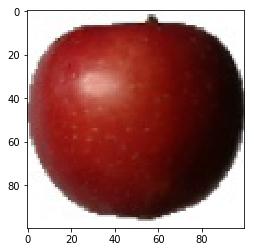

In [21]:
plt.imshow(Xtrain[1])


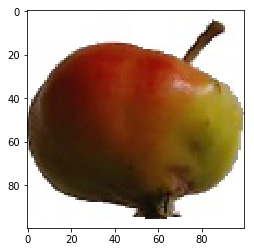

In [22]:
plt.imshow(Xtrain[5000])


In [23]:
first_model = Sequential()
first_model.add(Dense(100, activation='relu', input_shape=(Xflat_train.shape[1],)))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(100, activation='relu'))
#first_model.add(Dense(100, activation='softmax'))
#first_model.add(Dense(95, activation='softmax'))

first_model.summary()

first_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_model = first_model.fit(Xflat_train, Ytrain,
                          batch_size=128,
                          epochs=5,
                          verbose=1,
                          validation_data=(Xflat_test, Ytest))
score = first_model.evaluate(Xflat_test, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               3000100   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

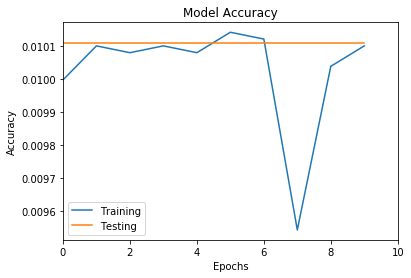

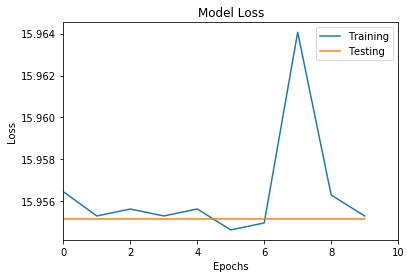

In [69]:
plt.plot(history_model.history['acc'])
plt.plot(history_model.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim((0, 10))
plt.legend(['Training', 'Testing'])
plt.show()

# Loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 10))
plt.legend(['Training', 'Testing'])
plt.show()